In [20]:
import importlib
import cv2

import yolo_pose as y
import face_landmark as f

importlib.reload(y)
importlib.reload(f)

<module 'face_landmark' from 'c:\\Users\\Tian_\\Documents\\School\\Meng\\AER 1515\\Project\\face_landmark.py'>

In [ ]:
# yolo stuff
model = y.test()

Ultralytics 8.3.227  Python-3.10.11 torch-2.7.1+cu128 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-pose.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

In [ ]:
# Access the results
results = model("./datasets/coco8-pose/images/train/000000000036.jpg")  # predict on an image

img = cv2.imread("./datasets/coco8-pose/images/train/000000000036.jpg")
y.draw_pose(img, results)

0.9960962
0.99556535
0.9530628
0.9614053
0.31691682
0.9959778
0.988203
0.9770215
0.892758
0.9165772
0.83713037
0.90008485
0.8489449
0.043745294
0.030992974
0.0026404357
0.0021164021


array([[[169, 173,  98],
        [167, 171,  96],
        [165, 169,  94],
        ...,
        [ 69,  74,  53],
        [ 66,  70,  51],
        [ 84,  87,  71]],

       [[172, 176, 101],
        [169, 173,  98],
        [168, 172,  97],
        ...,
        [ 67,  70,  48],
        [ 62,  67,  46],
        [ 48,  50,  31]],

       [[174, 178, 103],
        [171, 175, 100],
        [170, 174,  99],
        ...,
        [ 78,  81,  55],
        [ 74,  78,  53],
        [ 77,  79,  57]],

       ...,

       [[129, 123,  52],
        [129, 123,  52],
        [129, 123,  52],
        ...,
        [101, 100,  39],
        [107, 105,  41],
        [101,  95,  30]],

       [[128, 122,  51],
        [129, 123,  52],
        [130, 124,  53],
        ...,
        [126, 125,  51],
        [128, 125,  50],
        [118, 112,  37]],

       [[128, 122,  51],
        [130, 124,  53],
        [132, 126,  55],
        ...,
        [130, 126,  48],
        [129, 126,  45],
        [139, 132,  53]]

In [21]:
# face mesh stuff
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='./face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("./datasets/coco8-pose/images/train/000000000036.jpg")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = f.draw_landmarks_on_image(image.numpy_view(), detection_result)
print(annotated_image.shape)
cv2.imshow("face mesh", cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()


NormalizedLandmark(x=0.5342509746551514, y=0.40201377868652344, z=-0.027224399149417877, visibility=0.0, presence=0.0)
(640, 481, 3)


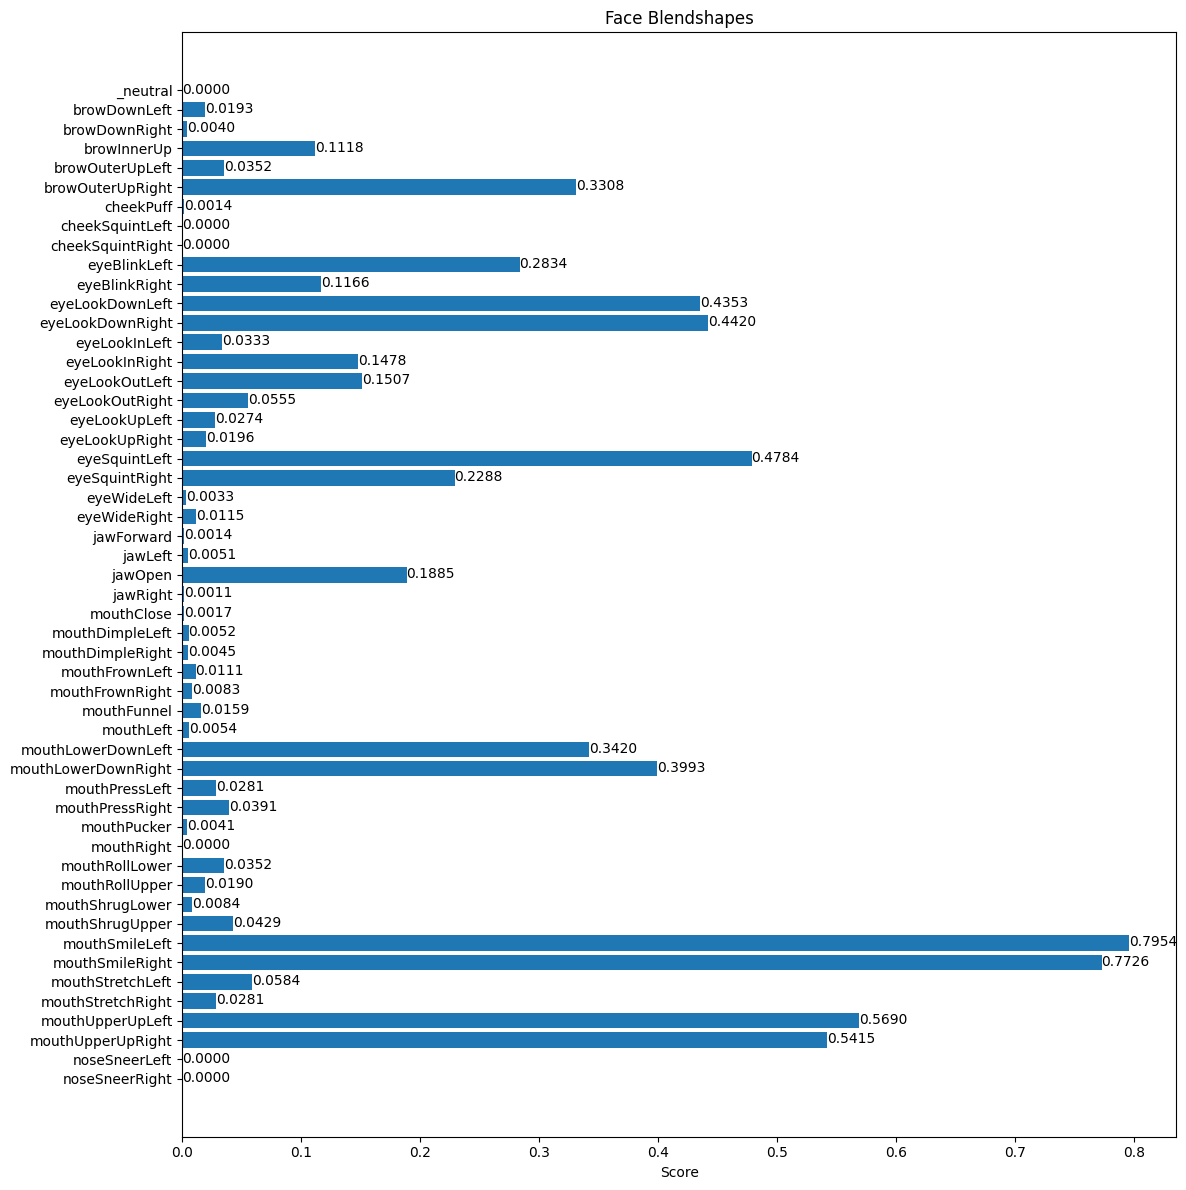

In [13]:
f.plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])